In [1]:
import pandas as pd
import numpy as numpy

import prepare

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

# evaluating/modeling methods
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

### 1. Select a dataset with a continuous target variable

In [2]:
df = sns.load_dataset('tips')

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [4]:
for column in df.columns:
    print(column.upper())
    print(df[column].value_counts())
    print("-----------------------")

TOTAL_BILL
13.42    3
10.33    2
20.29    2
18.29    2
17.92    2
        ..
30.40    1
26.59    1
19.65    1
9.55     1
5.75     1
Name: total_bill, Length: 229, dtype: int64
-----------------------
TIP
2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
        ..
2.83     1
1.58     1
3.71     1
3.35     1
2.18     1
Name: tip, Length: 123, dtype: int64
-----------------------
SEX
Male      157
Female     87
Name: sex, dtype: int64
-----------------------
SMOKER
No     151
Yes     93
Name: smoker, dtype: int64
-----------------------
DAY
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
-----------------------
TIME
Dinner    176
Lunch      68
Name: time, dtype: int64
-----------------------
SIZE
2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64
-----------------------


### 2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

In [5]:
#create new columns
df["tip_percentage"] = df.tip / df.total_bill
df["price_per_person"] = df.total_bill / df['size']


#focus on numeric features
df = df[["total_bill", "tip", "size", "price_per_person"]]

df.head()

,total_bill,tip,size,price_per_person
0,16.99,1.01,2,8.495000
1,10.34,1.66,3,3.446667
2,21.01,3.50,3,7.003333
3,23.68,3.31,2,11.840000
4,24.59,3.61,4,6.147500


In [6]:
train, validate, test = prepare.split(df)

train.shape, validate.shape, test.shape

((136, 4), (59, 4), (49, 4))

In [7]:
train.head()

,total_bill,tip,size,price_per_person
18,16.97,3.50,3,5.656667
172,7.25,5.15,2,3.625000
118,12.43,1.80,2,6.215000
28,21.70,4.30,2,10.850000
237,32.83,1.17,2,16.415000


In [8]:
#set up X inputs and y target variable for each split
X_train = train.drop(columns=['tip'])
y_train = train.tip

X_validate = validate.drop(columns=['tip'])
y_validate = validate.tip

X_test = test.drop(columns=['tip'])
y_test = test.tip

Text(0.5, 1.0, 'Distribution of Target: Total Tip')

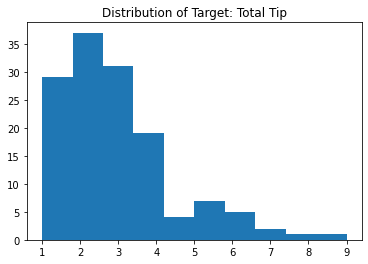

In [9]:
plt.hist(y_train)
plt.title('Distribution of Target: Total Tip')
#distribution is not normal, right-skewed

In [10]:
#scale data

#make                            #fit
scaler = MinMaxScaler(copy=True).fit(X_train)

#use
X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train_scaled = pd.DataFrame(X_train_scaled, 
                              columns=X_train.columns.values).\
                            set_index([X_train.index.values])

X_validate_scaled = pd.DataFrame(X_validate_scaled, 
                                columns=X_validate.columns.values).\
                            set_index([X_validate.index.values])

X_test_scaled = pd.DataFrame(X_test_scaled, 
                                columns=X_test.columns.values).\
                            set_index([X_test.index.values])
X_train_scaled.head()

,total_bill,size,price_per_person
18,0.307114,0.4,0.150344
172,0.092355,0.2,0.032258
118,0.206805,0.2,0.182796
28,0.411622,0.2,0.452194
237,0.657534,0.2,0.775647


### 3. Work through all of the steps outlined in the lesson, from setting the baseline to selecting a model and evaluating the final model on your test data.

In [12]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict tip_pred_mean
tip_pred_mean = y_train.tip.mean()
y_train['tip_pred_mean'] = tip_pred_mean
y_validate['tip_pred_mean'] = tip_pred_mean

# 2. Compute tip_pred_median
tip_pred_median = y_train.tip.median()
y_train['tip_pred_median'] = tip_pred_median
y_validate['tip_pred_median'] = tip_pred_median


# 3. RMSE of tip_pred_mean
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_mean) ** .5
rmse_validate = mean_squared_error(y_validate.tip, y_validate.tip_pred_mean) ** (1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

print(" ")
# 4. RMSE of tenure_pred_median
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_median) ** .5
rmse_validate = mean_squared_error(y_train.tip, y_train.tip_pred_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  1.45 
Validate/Out-of-Sample:  1.52
 
RMSE using Median
Train/In-Sample:  1.48 
Validate/Out-of-Sample:  1.48


In [13]:
#can say mean is our best baseline and will be our benchmark of comparison

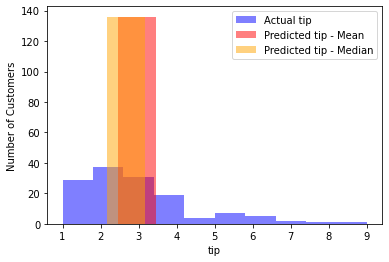

In [14]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.tip, color='blue', alpha=.5, label="Actual tip")
plt.hist(y_train.tip_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted tip - Mean")
plt.hist(y_train.tip_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted tip - Median")
plt.xlabel("tip")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()

In [15]:
#incrementally buidling a df for comparison of metrics for model selection
metric_df = pd.DataFrame(data = [{'model': 'mean_baseline', 
                                  'RMSE_validate': rmse_validate,
                                  'r^2_validate': explained_variance_score(y_validate.tip, y_validate.tip_pred_mean)}])

metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,1.4756,2.220446e-16


## LinearRegression (OLS)

In [16]:
# make the thing
# create the model object
lm = LinearRegression(normalize=True)

# fit the thing
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train_scaled, y_train.tip)


# use the thing!

# predict train
y_train['tip_pred_lm'] = lm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_lm) ** (1/2)


# predict validate
y_validate['tip_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tip, y_validate.tip_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  1.0241686647123436 
Validation/Out-of-Sample:  1.1158008575132419


In [17]:
#incrementally buidling a df for comparison of metrics for model selection
metric_df = metric_df.append({'model': 'OLS Regressor', 
                              'RMSE_validate': rmse_validate, 
                              'r^2_validate': explained_variance_score(y_validate.tip, y_validate.tip_pred_lm)}, ignore_index=True)

metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,1.475600,2.220446e-16
1,OLS Regressor,1.115801,4.445821e-01


## LassoLars

In [18]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lars.fit(X_train_scaled, y_train.tip)

# predict train
y_train['tip_pred_lars'] = lars.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_lm) ** (1/2)

# predict validate
y_validate['tip_pred_lars'] = lars.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tip, y_validate.tip_pred_lm) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  1.0241686647123436 
Validation/Out-of-Sample:  1.1158008575132419


In [19]:
metric_df = metric_df.append({'model': 'Lasso alpha 1', 
                              'RMSE_validate': rmse_validate, 
                              'r^2_validate': explained_variance_score(y_validate.tip, y_validate.tip_pred_lars)}, ignore_index=True)

metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,1.475600,2.220446e-16
1,OLS Regressor,1.115801,4.445821e-01
2,Lasso alpha 1,1.115801,2.220446e-16


## TweedieRegressor (GLM)

In [20]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)


# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train_scaled, y_train.tip)

# predict train
y_train['tip_pred_glm'] = glm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_glm) ** (1/2)

# predict validate
y_validate['tip_pred_glm'] = glm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_train.tip, y_train.tip_pred_glm) ** (1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  1.0515024558276864 
Validation/Out-of-Sample:  1.0515024558276864


In [21]:
metric_df = metric_df.append({'model': 'GLS (Poisson)', 
                              'RMSE_validate': rmse_validate, 
                              'r^2_validate': explained_variance_score(y_validate.tip, y_validate.tip_pred_glm)}, ignore_index=True)

metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,1.475600,2.220446e-16
1,OLS Regressor,1.115801,4.445821e-01
2,Lasso alpha 1,1.115801,2.220446e-16
3,GLS (Poisson),1.051502,4.622036e-01


## Polynomial Regression

In [22]:
## Polynomial Features ##
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 =  pf.transform(X_test_scaled)


## LinearRegression ##
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_scaled, y_train.tip)

# predict train
y_train['tip_pred_lm2'] = lm2.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_lm2) ** (1/2)

# predict validate
y_validate['tip_pred_lm2'] = lm2.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tip, y_validate.tip_pred_lm2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  1.0241686647123436 
Validation/Out-of-Sample:  1.2450115536272857


In [23]:
metric_df = metric_df.append({'model': 'Quadratic Model', 
                              'RMSE_validate': rmse_validate, 
                              'r^2_validate': explained_variance_score(y_validate.tip, y_validate.tip_pred_lm2)}, ignore_index=True)

metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,1.475600,2.220446e-16
1,OLS Regressor,1.115801,4.445821e-01
2,Lasso alpha 1,1.115801,2.220446e-16
3,GLS (Poisson),1.051502,4.622036e-01
4,Quadratic Model,1.245012,4.445821e-01


## Evaluate

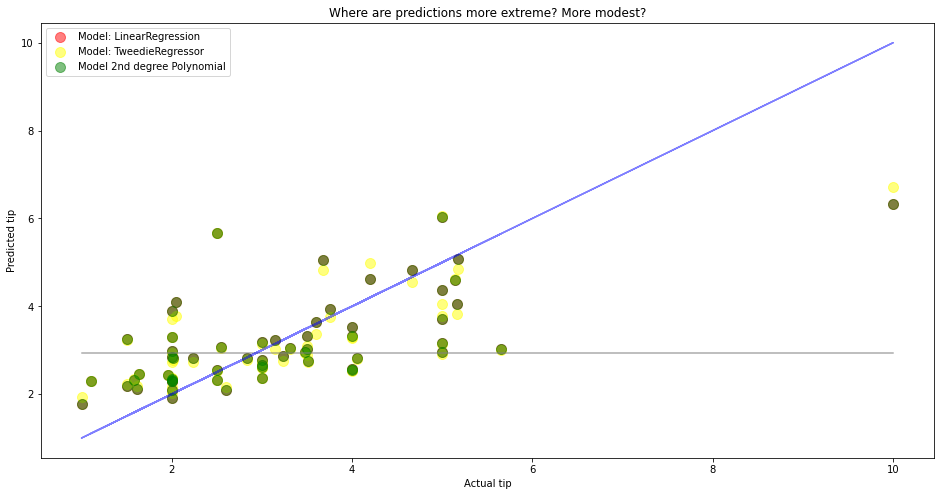

In [24]:
#plotting actual vs predicted values
# y_validate.head()
plt.figure(figsize=(16,8))

plt.plot(y_validate.tip, y_validate.tip_pred_mean, alpha=.5, color="gray", label='_nolegend_')

plt.plot(y_validate.tip, y_validate.tip, alpha=.5, color="blue", label='_nolegend_')

plt.scatter(y_validate.tip, y_validate.tip_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tip, y_validate.tip_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tip, y_validate.tip_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual tip")
plt.ylabel("Predicted tip")
plt.title("Where are predictions more extreme? More modest?")

plt.show()

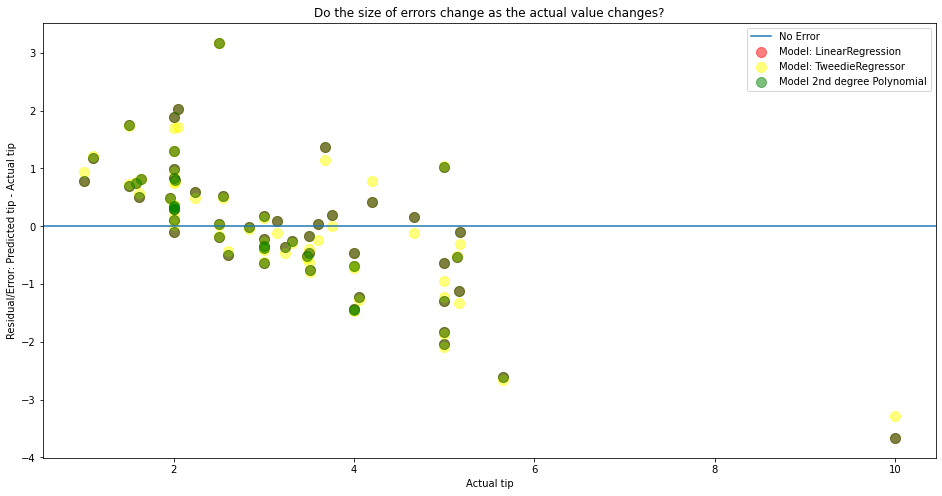

In [25]:
#residual plots: plotting the errors in predictions
# y_validate.head()
plt.figure(figsize=(16,8))

plt.axhline(label="No Error")

plt.scatter(y_validate.tip, y_validate.tip_pred_lm - y_validate.tip , 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tip, y_validate.tip_pred_glm - y_validate.tip, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tip, y_validate.tip_pred_lm2 - y_validate.tip, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual tip")
plt.ylabel("Residual/Error: Predicted tip - Actual tip")
plt.title("Do the size of errors change as the actual value changes?")

plt.show()

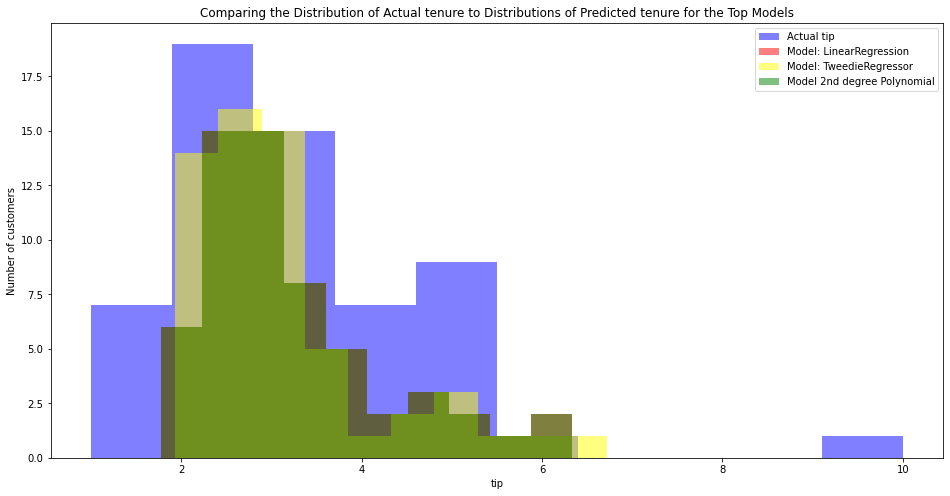

In [26]:
#histogram
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))

plt.hist(y_validate.tip, color='blue', alpha=.5, label="Actual tip")
plt.hist(y_validate.tip_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.tip_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.tip_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("tip")
plt.ylabel("Number of customers")
plt.title("Comparing the Distribution of Actual tenure to Distributions of Predicted tenure for the Top Models")
plt.legend()
plt.show()

#### Model Selection & Out-of_Sample Evaluation
Model selected: glm (poisson) (using TweedieRegressor) ((power=1, alpha=0))

In [27]:
y_test = pd.DataFrame(y_test)

# predict on test
y_test['tip_pred_lm'] = lm.predict(X_test_scaled)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.tip, y_test.tip_pred_lm) ** (1/2)

print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  0.8477795632867091
